# **Security Breach Analysis**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

Write down which data or information you need to run the notebook 
Dataset Summary
Total Rows: 40,000
Columns: 25
Missing Data:
Malware Indicators, Alerts/Warnings, Proxy Information, Firewall Logs, and IDS/IPS Alerts have missing values.
Issues Identified:
Timestamp format needs conversion.
Attack Type standardization (case normalization).
Missing values need handling.
Duplicate entries should be removed.


## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [6]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\mukti\\Desktop\\codeInstitute\\SecurityBreachAnalysis\\SecurityBreachAnalysis'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [7]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [8]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\mukti\\Desktop\\codeInstitute\\SecurityBreachAnalysis'

# Section 1

# Section 1 ETL pipeline for Security Breach Analysis

In [9]:
import pandas as pd  # library for data manipulation
import numpy as np   # library for numerical operations

def clean_and_transform_data(input_file, output_file):  # function to clean and transform the data
    """
    Cleans and transforms the cybersecurity attack dataset.

    :param input_file: Path to the raw CSV file
    :param output_file: Path to save the cleaned and transformed CSV file
    """
    try:
        # Load the dataset
        df = pd.read_csv(input_file)

        # Convert Timestamp column to datetime format
        df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

        # Extract Date and Hour for time-based analysis
        df['Date'] = df['Timestamp'].dt.date
        df['Hour'] = df['Timestamp'].dt.hour

        # Standardize Attack Type (convert to lowercase)
        df['Attack Type'] = df['Attack Type'].str.lower().str.strip()

        # Handle missing values: Fill with "Unknown" for categorical columns
        columns_to_fill = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']
        df[columns_to_fill] = df[columns_to_fill].fillna("Unknown")

        # Categorize Severity Level based on Attack Type (example logic)
        severity_mapping = {
            "ddos": "High",
            "ransomware": "High",
            "phishing": "Medium",
            "malware": "High",
            "brute force": "Medium",
            "sql injection": "Medium",
            "xss": "Low"
        }
        df['Severity Category'] = df['Attack Type'].map(severity_mapping).fillna("Unknown")

        # Drop duplicate rows if any exist
        df.drop_duplicates(inplace=True)

        # Save the cleaned and transformed dataset
        df.to_csv(output_file, index=False)

        # Print message upon successful completion
        print(f"✅ Data cleaning & transformation complete! Cleaned file saved as: {output_file}") 

    except Exception as e:
        print(f"❌ Error during processing: {e}")

# Define file paths
input_csv = "cybersecurity_attacks.csv"           # raw dataset
output_csv = "cleaned_cybersecurity_attacks.csv"  # cleaned and transformed dataset

# Run the cleaning function
clean_and_transform_data(input_csv, output_csv)

✅ Data cleaning & transformation complete! Cleaned file saved as: cleaned_cybersecurity_attacks.csv


---

# Analysing and Visulaisation of Security Breach Analysis

Section 2 content

In [10]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt

# Enable plotly rendering in Jupyter
pio.renderers.default = "notebook"


In [11]:
# Load dataset
input_csv = "cleaned_cybersecurity_attacks.csv"  # cleaned dataset
df = pd.read_csv(input_csv) 

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extract Date and Month
df['Date'] = df['Timestamp'].dt.date
df['Month'] = df['Timestamp'].dt.to_period("M")

# Display first few rows to verify
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Date,Hour,Severity Category,Month
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,Unknown,Server,2023-05-30,6,High,2023-05
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Segment B,"Bilaspur, Nagaland",Unknown,Log Data,Unknown,Firewall,2020-08-26,7,High,2020-08
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,2022-11-13,8,High,2022-11
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Segment B,"Jaunpur, Rajasthan",Unknown,Unknown,Alert Data,Firewall,2023-07-02,10,High,2023-07
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Segment C,"Anantapur, Tripura",149.6.110.119,Unknown,Alert Data,Firewall,2023-07-16,13,High,2023-07


In [16]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load dataset
df = pd.read_csv("cleaned_cybersecurity_attacks.csv")

def plot_attack_type_distribution(df):
    attack_counts = df['Attack Type'].value_counts().reset_index()
    attack_counts.columns = ['Attack Type', 'Count']
    fig = px.bar(attack_counts, x='Attack Type', y='Count',
                 labels={'Attack Type': 'Attack Type', 'Count': 'Count'},
                 title='Attack Type Distribution', color='Attack Type')
    fig.show()

def plot_severity_level_distribution(df):
    fig = px.pie(df, names='Severity Level', title='Severity Level Distribution')
    fig.show()

def plot_traffic_type_distribution(df):
    traffic_counts = df['Traffic Type'].value_counts().reset_index()
    traffic_counts.columns = ['Traffic Type', 'Count']
    fig = px.bar(traffic_counts, x='Traffic Type', y='Count',
                 labels={'Traffic Type': 'Traffic Type', 'Count': 'Count'},
                 title='Traffic Type Distribution', color='Traffic Type')
    fig.show()

def plot_anomaly_score_distribution(df):
    fig = px.histogram(df, x='Anomaly Scores', nbins=50, title='Anomaly Score Distribution')
    fig.show()

def plot_attacks_over_time(df):
    df['Date'] = pd.to_datetime(df['Date'])
    attack_counts = df.groupby('Date').size().reset_index(name='Count')
    fig = px.line(attack_counts, x='Date', y='Count', title='Attacks Over Time')
    fig.show()

def plot_top_source_ips(df, top_n=10):
    top_ips = df['Source IP Address'].value_counts().nlargest(top_n).reset_index()
    top_ips.columns = ['Source IP Address', 'Count']
    fig = px.bar(top_ips, x='Source IP Address', y='Count',
                 labels={'Source IP Address': 'Source IP Address', 'Count': 'Count'},
                 title=f'Top {top_n} Source IP Addresses', color='Source IP Address')
    fig.show()

# Call functions
plot_attack_type_distribution(df)
plot_severity_level_distribution(df)
plot_traffic_type_distribution(df)
plot_anomaly_score_distribution(df)
plot_attacks_over_time(df)
plot_top_source_ips(df)



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [13]:
# Check if Latitude and Longitude exist before plotting
if "Latitude" in df.columns and "Longitude" in df.columns:
    fig2 = px.scatter_geo(df, lat="Latitude", lon="Longitude", hover_name="Attack Type",
                          title="Cyber Attacks by Region", color_discrete_sequence=["red"], opacity=0.7)
    fig2.show()
else:
    print("⚠️ Latitude and Longitude columns not found in dataset.")

⚠️ Latitude and Longitude columns not found in dataset.


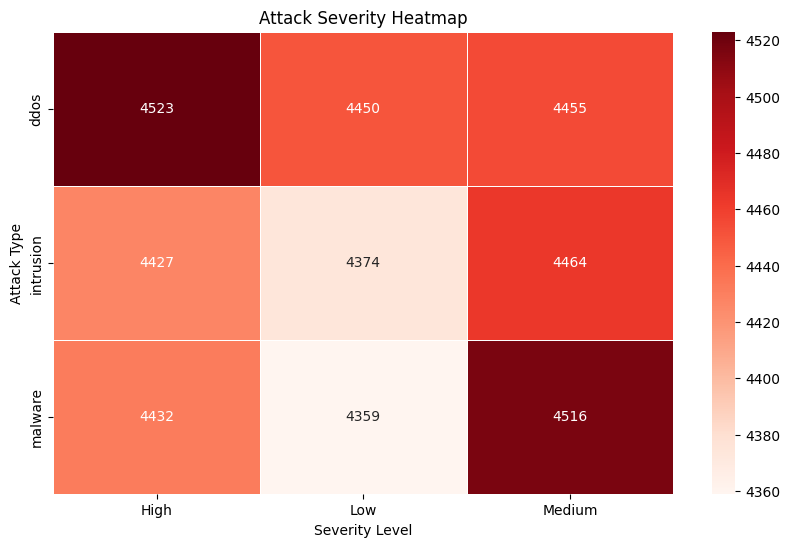

In [14]:
# Check if Severity Level and Attack Type exist
if "Severity Level" in df.columns and "Attack Type" in df.columns:
    pivot_table = df.pivot_table(index="Attack Type", columns="Severity Level", aggfunc="size", fill_value=0)

    # Enable inline plots for Jupyter Notebook
    %matplotlib inline

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, cmap="Reds", annot=True, fmt="d", linewidths=0.5)
    plt.title("Attack Severity Heatmap")
    plt.xlabel("Severity Level")
    plt.ylabel("Attack Type")
    plt.show()
else:
    print("⚠️ Severity Level or Attack Type column not found in dataset.")

In [ ]:


# Filter for DDoS attacks only
ddos_df = df[df['Attack Type'].str.lower() == "ddos"]

if ddos_df.empty:
    print("⚠️ No DDoS attacks found in the dataset.")
else:
    # 1. DDoS Attack Trend Over Time
    plt.figure(figsize=(12, 5))
    ddos_df['Date'].value_counts().sort_index().plot(kind='line', marker='o', color='blue')
    plt.xlabel("Date")
    plt.ylabel("Number of DDoS Attacks")
    plt.title("DDoS Attacks Over Time")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

    # 2. DDoS Attacks by Hour
    plt.figure(figsize=(10, 5))
    ddos_df['Hour'].value_counts().sort_index().plot(kind='bar', color='red')
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of DDoS Attacks")
    plt.title("DDoS Attacks by Hour")
    plt.show()

    # 3. DDoS Attack Severity Distribution (if applicable)
    if 'Severity Category' in ddos_df.columns:
        plt.figure(figsize=(8, 4))
        ddos_df['Severity Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'orange', 'yellow'])
        plt.title("DDoS Attack Severity Distribution")
        plt.ylabel("")
        plt.show()

    # 4. Heatmap of DDoS Attacks by Hour
    plt.figure(figsize=(10, 5))
    hourly_attacks = ddos_df.groupby('Hour').size()
    sns.heatmap(hourly_attacks.values.reshape(1, -1), cmap="Reds", annot=True, fmt="d", linewidths=0.5)
    plt.xlabel("Hour of Day")
    plt.title("Heatmap of DDoS Attacks by Hour")
    plt.show()

    print("DDoS Attack Analysis Completed!")

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
